#Predicting House Prices

In [1]:
import graphlab

In [2]:
sales = graphlab.SFrame('home_data.gl/')

This non-commercial license of GraphLab Create for academic use is assigned to rtharrison86@gmail.com and will expire on January 24, 2018.


[INFO] graphlab.cython.cy_server: GraphLab Create v2.1 started. Logging: /tmp/graphlab_server_1485825083.log


In [3]:
sales

id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront
7129300520,2014-10-13 00:00:00+00:00,221900,3,1,1180,5650,1,0
6414100192,2014-12-09 00:00:00+00:00,538000,3,2.25,2570,7242,2,0
5631500400,2015-02-25 00:00:00+00:00,180000,2,1,770,10000,1,0
2487200875,2014-12-09 00:00:00+00:00,604000,4,3,1960,5000,1,0
1954400510,2015-02-18 00:00:00+00:00,510000,3,2,1680,8080,1,0
7237550310,2014-05-12 00:00:00+00:00,1225000,4,4.5,5420,101930,1,0
1321400060,2014-06-27 00:00:00+00:00,257500,3,2.25,1715,6819,2,0
2008000270,2015-01-15 00:00:00+00:00,291850,3,1.5,1060,9711,1,0
2414600126,2015-04-15 00:00:00+00:00,229500,3,1,1780,7470,1,0
3793500160,2015-03-12 00:00:00+00:00,323000,3,2.5,1890,6560,2,0


#Exploring the data for housing

In [11]:
graphlab.canvas.set_target("browser")
sales.show(view="Scatter Plot", x="sqft_living", y="price")

Canvas is accessible via web browser at the URL: http://localhost:56501/index.html
Opening Canvas in default web browser.


In [13]:
# simple regression model sqft_living to price
train_data, test_data = sales.random_split(0.8, seed=0)

In [ ]:
sqft_model = graphlab.linear_regression.create(train_data, target='price', features=['sqft_living'])

#Evaluating

In [21]:
test_data['price'].mean()

543054.0425632538

In [20]:
sqft_model.evaluate(test_data)

{'max_error': 4149788.719099304, 'rmse': 255178.07654316962}

# Visualizing Predictions

In [24]:
import matplotlib.pyplot as plt
%matplotlib inline

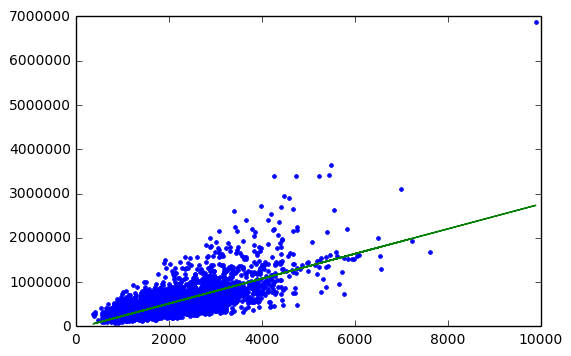

In [31]:
plt.plot(test_data['sqft_living'], test_data['price'], '.',
         test_data['sqft_living'], sqft_model.predict(test_data), '-')

In [32]:
sqft_model.get('coefficients')

name,index,value,stderr
(intercept),None,-45733.9919902,5065.52251801
sqft_living,None,281.187590788,2.22480261684


# Explore Other Features in the Data

In [34]:
model_features = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'zipcode']

In [35]:
sales[model_features].show()

Canvas is accessible via web browser at the URL: http://localhost:56501/index.html
Opening Canvas in default web browser.


In [36]:
sales.show(view='BoxWhisker Plot', x='zipcode', y='price')

Canvas is updated and available in a tab in the default browser.


# More features in the model

In [38]:
multi_features_model = graphlab.linear_regression.create(train_data, target='price', features=model_features)

PROGRESS: Creating a validation set from 5 percent of training data. This may take a while.
          You can set ``validation_set=None`` to disable validation tracking.



<pre>Linear regression:</pre>

<pre>--------------------------------------------------------</pre>

<pre>Number of examples          : 16586</pre>

<pre>Number of features          : 6</pre>

<pre>Number of unpacked features : 6</pre>

<pre>Number of coefficients    : 115</pre>

<pre>Starting Newton Method</pre>

<pre>--------------------------------------------------------</pre>

<pre>+-----------+----------+--------------+--------------------+----------------------+---------------+-----------------+</pre>

<pre>| Iteration | Passes   | Elapsed Time | Training-max_error | Validation-max_error | Training-rmse | Validation-rmse |</pre>

<pre>+-----------+----------+--------------+--------------------+----------------------+---------------+-----------------+</pre>

<pre>| 1         | 2        | 0.042430     | 3782105.945061     | 2507424.544383       | 181624.242901 | 190422.936147   |</pre>

<pre>+-----------+----------+--------------+--------------------+----------------------+---------------+-----------------+</pre>

<pre>SUCCESS: Optimal solution found.</pre>

<pre></pre>

In [39]:
print model_features

['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'zipcode']


In [42]:
print sqft_model.evaluate(test_data)
print multi_features_model.evaluate(test_data)

{'max_error': 4149788.719099304, 'rmse': 255178.07654316962}
{'max_error': 3509416.1838747244, 'rmse': 179689.1312139645}


# Apply Learned Models to predict prices of 3 houses

In [44]:
house1 = sales[sales['id']=='5309101200']
house1

<div style="max-height:1000px;max-width:1500px;overflow:auto;"><table frame="box" rules="cols">
    <tr>
        <th style="padding-left: 1em; padding-right: 1em; text-align: center">id</th>
        <th style="padding-left: 1em; padding-right: 1em; text-align: center">date</th>
        <th style="padding-left: 1em; padding-right: 1em; text-align: center">price</th>
        <th style="padding-left: 1em; padding-right: 1em; text-align: center">bedrooms</th>
        <th style="padding-left: 1em; padding-right: 1em; text-align: center">bathrooms</th>
        <th style="padding-left: 1em; padding-right: 1em; text-align: center">sqft_living</th>
        <th style="padding-left: 1em; padding-right: 1em; text-align: center">sqft_lot</th>
        <th style="padding-left: 1em; padding-right: 1em; text-align: center">floors</th>
        <th style="padding-left: 1em; padding-right: 1em; text-align: center">waterfront</th>
    </tr>
    <tr>
        <td style="padding-left: 1em; padding-right: 1em; text-align: center; vertical-align: top">5309101200</td>
        <td style="padding-left: 1em; padding-right: 1em; text-align: center; vertical-align: top">2014-06-05 00:00:00+00:00</td>
        <td style="padding-left: 1em; padding-right: 1em; text-align: center; vertical-align: top">620000</td>
        <td style="padding-left: 1em; padding-right: 1em; text-align: center; vertical-align: top">4</td>
        <td style="padding-left: 1em; padding-right: 1em; text-align: center; vertical-align: top">2.25</td>
        <td style="padding-left: 1em; padding-right: 1em; text-align: center; vertical-align: top">2400</td>
        <td style="padding-left: 1em; padding-right: 1em; text-align: center; vertical-align: top">5350</td>
        <td style="padding-left: 1em; padding-right: 1em; text-align: center; vertical-align: top">1.5</td>
        <td style="padding-left: 1em; padding-right: 1em; text-align: center; vertical-align: top">0</td>
    </tr>
</table>
<table frame="box" rules="cols">
    <tr>
        <th style="padding-left: 1em; padding-right: 1em; text-align: center">view</th>
        <th style="padding-left: 1em; padding-right: 1em; text-align: center">condition</th>
        <th style="padding-left: 1em; padding-right: 1em; text-align: center">grade</th>
        <th style="padding-left: 1em; padding-right: 1em; text-align: center">sqft_above</th>
        <th style="padding-left: 1em; padding-right: 1em; text-align: center">sqft_basement</th>
        <th style="padding-left: 1em; padding-right: 1em; text-align: center">yr_built</th>
        <th style="padding-left: 1em; padding-right: 1em; text-align: center">yr_renovated</th>
        <th style="padding-left: 1em; padding-right: 1em; text-align: center">zipcode</th>
        <th style="padding-left: 1em; padding-right: 1em; text-align: center">lat</th>
    </tr>
    <tr>
        <td style="padding-left: 1em; padding-right: 1em; text-align: center; vertical-align: top">0</td>
        <td style="padding-left: 1em; padding-right: 1em; text-align: center; vertical-align: top">4</td>
        <td style="padding-left: 1em; padding-right: 1em; text-align: center; vertical-align: top">7</td>
        <td style="padding-left: 1em; padding-right: 1em; text-align: center; vertical-align: top">1460</td>
        <td style="padding-left: 1em; padding-right: 1em; text-align: center; vertical-align: top">940</td>
        <td style="padding-left: 1em; padding-right: 1em; text-align: center; vertical-align: top">1929</td>
        <td style="padding-left: 1em; padding-right: 1em; text-align: center; vertical-align: top">0</td>
        <td style="padding-left: 1em; padding-right: 1em; text-align: center; vertical-align: top">98117</td>
        <td style="padding-left: 1em; padding-right: 1em; text-align: center; vertical-align: top">47.67632376</td>
    </tr>
</table>
<table frame="box" rules="cols">
    <tr>
        <th style="padding-left: 1em; padding-right: 1em; text-align: center">long</th>
        <th style="pad

<img src='house-5309101200'/>

<img src='house-5309101200.jpg'/>

In [47]:
sqft_model.predict(house1)

dtype: float
Rows: 1
[629116.2259003973]

In [48]:
multi_features_model.predict(house1)

dtype: float
Rows: 1
[720203.2793701924]

### Simple model did better for specific house

In [49]:
house2 = sales[sales['id']=='1925069082']

In [50]:
house2

<div style="max-height:1000px;max-width:1500px;overflow:auto;"><table frame="box" rules="cols">
    <tr>
        <th style="padding-left: 1em; padding-right: 1em; text-align: center">id</th>
        <th style="padding-left: 1em; padding-right: 1em; text-align: center">date</th>
        <th style="padding-left: 1em; padding-right: 1em; text-align: center">price</th>
        <th style="padding-left: 1em; padding-right: 1em; text-align: center">bedrooms</th>
        <th style="padding-left: 1em; padding-right: 1em; text-align: center">bathrooms</th>
        <th style="padding-left: 1em; padding-right: 1em; text-align: center">sqft_living</th>
        <th style="padding-left: 1em; padding-right: 1em; text-align: center">sqft_lot</th>
        <th style="padding-left: 1em; padding-right: 1em; text-align: center">floors</th>
        <th style="padding-left: 1em; padding-right: 1em; text-align: center">waterfront</th>
    </tr>
    <tr>
        <td style="padding-left: 1em; padding-right: 1em; text-align: center; vertical-align: top">1925069082</td>
        <td style="padding-left: 1em; padding-right: 1em; text-align: center; vertical-align: top">2015-05-11 00:00:00+00:00</td>
        <td style="padding-left: 1em; padding-right: 1em; text-align: center; vertical-align: top">2200000</td>
        <td style="padding-left: 1em; padding-right: 1em; text-align: center; vertical-align: top">5</td>
        <td style="padding-left: 1em; padding-right: 1em; text-align: center; vertical-align: top">4.25</td>
        <td style="padding-left: 1em; padding-right: 1em; text-align: center; vertical-align: top">4640</td>
        <td style="padding-left: 1em; padding-right: 1em; text-align: center; vertical-align: top">22703</td>
        <td style="padding-left: 1em; padding-right: 1em; text-align: center; vertical-align: top">2</td>
        <td style="padding-left: 1em; padding-right: 1em; text-align: center; vertical-align: top">1</td>
    </tr>
</table>
<table frame="box" rules="cols">
    <tr>
        <th style="padding-left: 1em; padding-right: 1em; text-align: center">view</th>
        <th style="padding-left: 1em; padding-right: 1em; text-align: center">condition</th>
        <th style="padding-left: 1em; padding-right: 1em; text-align: center">grade</th>
        <th style="padding-left: 1em; padding-right: 1em; text-align: center">sqft_above</th>
        <th style="padding-left: 1em; padding-right: 1em; text-align: center">sqft_basement</th>
        <th style="padding-left: 1em; padding-right: 1em; text-align: center">yr_built</th>
        <th style="padding-left: 1em; padding-right: 1em; text-align: center">yr_renovated</th>
        <th style="padding-left: 1em; padding-right: 1em; text-align: center">zipcode</th>
        <th style="padding-left: 1em; padding-right: 1em; text-align: center">lat</th>
    </tr>
    <tr>
        <td style="padding-left: 1em; padding-right: 1em; text-align: center; vertical-align: top">4</td>
        <td style="padding-left: 1em; padding-right: 1em; text-align: center; vertical-align: top">5</td>
        <td style="padding-left: 1em; padding-right: 1em; text-align: center; vertical-align: top">8</td>
        <td style="padding-left: 1em; padding-right: 1em; text-align: center; vertical-align: top">2860</td>
        <td style="padding-left: 1em; padding-right: 1em; text-align: center; vertical-align: top">1780</td>
        <td style="padding-left: 1em; padding-right: 1em; text-align: center; vertical-align: top">1952</td>
        <td style="padding-left: 1em; padding-right: 1em; text-align: center; vertical-align: top">0</td>
        <td style="padding-left: 1em; padding-right: 1em; text-align: center; vertical-align: top">98052</td>
        <td style="padding-left: 1em; padding-right: 1em; text-align: center; vertical-align: top">47.63925783</td>
    </tr>
</table>
<table frame="box" rules="cols">
    <tr>
        <th style="padding-left: 1em; padding-right: 1em; text-align: center">long</th>
        <th style="pa

In [51]:
print sqft_model.predict(house2)
print multi_features_model.predict(house2)

[1258976.4292649725]
[1467736.7018800932]
